<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics-Private/blob/main/assignments/assignment2022/BIA_assignment_2022_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Intelligence and Analytics - Assignment 2022 - Solution


Welcome to the Assignment! 

You have to complete this notebook to find the answers to the 10 questions below. We already provide some initial code to read in the data from the data subfolder.

In order to receive a grade and properly submit the assignment, you will have to do **both** steps mentioned below. Both of these must be done on the Moodle page, right under the forums.

* Answer the [questions on the quiz](https://moodle.unil.ch/mod/quiz/view.php?id=1234974).
* Submit your [notebook](https://moodle.unil.ch/mod/assign/view.php?id=1282597).

**The bonus for this assignment is binary. You get the full bonus or nothing. To reveive the full bonus you need to answer correctly 7 questions out of the 10 (i.e. more than 65% of the quiz points).**

Make sure to follow all instructions carefully.

Good luck! 🍀

**Note**: Have your notebook with the asnwers ready for answering the quiz. 

**Questions**: You can post your [questions in Moodle in the dedicated forum here](https://moodle.unil.ch/mod/forum/view.php?id=1207935). No questions will be answered by email.


## Part 1. Data Cleaning

First a few preliminary steps to set you up. You can execute the cells below to get you started.

In [35]:
# Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
# Load the data
df=pd.read_csv('https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/sales.csv')

# Visualise first 3 rows
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


For the first part we use data on the retail sales of a store over several years. The dataset includes information on items purchased from this store, including for each item or article:

* order ID: a unique identifyier of the order through which this item was purchased
* order date: date of the order
* ship date: date the shipment was made
* ship mode: mode of shipment used (first class, second class, etc.)
* customer ID: unique identifyier of the client
* customer name
* client segment: consumer, corporate, etc.
* country, city, state, postal code, region of the client
* product ID, product category, sub-category, and product name
* sales: the value of sales for a given purchased item in USD.



### Question 1. 🔢 How many observations (rows) and columns does the dataset contain? 

In [37]:
# YOUR CODE HERE
rows = df.shape[0]
cols = df.shape[1]
print(f"There are {rows} observations caracterised by {cols} attributes")

There are 9800 observations caracterised by 18 attributes


Now please check what are the data types of the different attributes (columns).

In [38]:
# YOUR CODE HERE
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

Change the data type for the following columns: Order Date and Ship Date: from string to datetime.

**Hint**: make sure that days, month, year are encoded correctly. For this you can check what the date looks like before and after the encoding. 

In [39]:
# checking existing format of dates
df['Order Date'].tail()

9795    21/05/2017
9796    12/01/2016
9797    12/01/2016
9798    12/01/2016
9799    12/01/2016
Name: Order Date, dtype: object

In [40]:
# from the line of code above we can see that we need to encode dates in the format DAY, MONTH, YEAR (can't have 21 as a month)

df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d/%m/%Y")

In [41]:
# check again the last 5 dates in the series

df['Order Date'].tail()

9795   2017-05-21
9796   2016-01-12
9797   2016-01-12
9798   2016-01-12
9799   2016-01-12
Name: Order Date, dtype: datetime64[ns]

In [42]:
# do the same for the other date series
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format="%d/%m/%Y")

df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

Drop missing values for Postal code and change the data type from numeric (float) to categorical.

In [43]:
# 11 values are missing
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [44]:
# YOUR CODE HERE
df.dropna(inplace=True)

In [45]:
# to check the result
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [46]:
df.shape

(9789, 18)

In [47]:
# change data type to categorical

df['Postal Code'] = df['Postal Code'].astype('category')

In [48]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code            category
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

### Question 2. 🕓 For which order period have these data samples been collected? (i.e, what is the oldest and the most recent `order date` in the dataset) 

In [49]:
# YOUR CODE HERE
oldest = min(df['Order Date'])
newest = max(df['Order Date'])
print(f"There are orders from {oldest.strftime('%d/%m/%Y')} to {newest.strftime('%d/%m/%Y')}")

There are orders from 03/01/2015 to 30/12/2018


### Question 3. 🧍 How many unique customers did the shop have over the entire period? 
**Hint**: look at `customer id` and count the unique values.

In [50]:
# YOUR CODE HERE
df['Customer ID'].nunique()

793

### Question 4. ⭐ What are the 5 most frequently bought product sub-categories ? 
**Hint**: look at `sub-category` and count the times different categories appear in the dataset.

In [51]:
# YOUR CODE HERE
df.groupby('Sub-Category')['Sales'].count().sort_values(ascending=False).head()

Sub-Category
Binders        1492
Paper          1336
Furnishings     931
Phones          875
Storage         831
Name: Sales, dtype: int64

### Question 5. 🚚 Create a new column storing the time difference between `Ship Date` and `Order Date`, call it `Delivery Time`. What was the longest and the shortest delivery time in days? 

In [52]:
# YOUR CODE HERE
df['delivery'] = df['Ship Date'] - df['Order Date']
df.delivery.describe()

count                         9789
mean     3 days 23:04:06.031259577
std      1 days 18:00:39.083391657
min                0 days 00:00:00
25%                3 days 00:00:00
50%                4 days 00:00:00
75%                5 days 00:00:00
max                7 days 00:00:00
Name: delivery, dtype: object

## Part 2. Classification
For the second part, we will use an employee retention dataset.   
The dataset contains information on a company's employees such as:

* satisfaction level, ranges from 0 to 1
* score of the last evaluation they received, ranges from 0 to 1
* number of projects in which the employee is involved 
* average number of hours worked per month
* years spent with the company
* whether they experienced a work accident (1 if yes, 0 if no)
* whether they left thier job (1) or stayed with the company (0)
* whether they received a promotion in the last 5 years (1 if yes, 0 if no)
* the department in which they work
* whether their salary was low, medium or high.


### Load the data

In a first step, load the dataset (`HR_comma_sep.csv`) and display the first few rows. You can find the corresponding url and code below. 


In [53]:
# Load data
df=pd.read_csv('https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/HR_comma_sep.csv')
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


Your task is to build a model that predicts whether an employee stays (0) or leaves the company (1), using column `left` and the following 8 columns for your prediction: `satisfaction_level`, `last_evaluation`, `number_project`, `average_monthly_hours`, `time_spent_company`, `work_accident`, `promotion_last_5years`, and the label-encoded salary, which you obtain following the guiding steps below.

As a first step you may want to import any additional packages if not already done.

In [54]:
# YOUR CODE HERE

In [55]:
# import some additional packages
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn. preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

# set the random seed
np.random.seed = 42

✅ Please note for all following questions we ask you to set the random seed to 42. So please make sure you run the code in the cell above `np.random.seed=42`.

### Question 6. 💼 What is the proportion of employees who stayed on their job (in the entire dataset)?  
**Hint**: you should use the `left` column and just divide the number of employees who stayed on their job (left=0) by the total number of observations. Round to *two decimals*. e.g.: 0.6194 should be rounded to 0.62.

In [56]:
# YOUR CODE HERE
df.left.value_counts()/df.shape[0]
print(f"Proportion stayed on the job:\n{np.max(df.left.value_counts()/df.shape[0]):.4f}")

Proportion stayed on the job:
0.7619


The next step is to encode categorical variables. First encode `salary` with a simple LabelEncoder (just choose the automatic labelling given by the sklearn label encoder).

In [57]:
# YOUR CODE HERE
le = LabelEncoder()
le_salary=pd.Series(le.fit_transform(df.salary), name='le_salary')

Now replace the encoded `salary` in the initial dataframe and drop the department column. You can use the `pd.concat` function to add a column and `pd.drop` function to remove the old columns `salary` and `department`. 
> Hint: You should have a total of 9 features in the revised dataset.

In [58]:
# YOUR CODE HERE

# adding the new column
data = pd.concat([df, le_salary], axis=1)

# deleting the old column
data.drop(['salary', 'department'], axis=1, inplace=True)

# checking outcome of implemented changes
print(data.shape)
print(data.columns)

(14999, 9)
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'work_accident', 'left',
       'promotion_last_5years', 'le_salary'],
      dtype='object')


Set the y and X variables for your model, using `left` as the dependent variable and the following 8 independent variables: `satisfaction_level`, `last_evaluation`, `number_project`, `average_monthly_hours`, `time_spent_company`, `work_accident`, `promotion_last_5years`, and the label-encoded salary.

In [59]:
# YOUR CODE HERE
y=data.left
X=data.drop('left', axis=1)

# checking what X looks like
X.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,promotion_last_5years,le_salary
0,0.38,0.53,2,157,3,0,0,1


Train/test splitting: Now split the data into 80% training and 20% test set. Remember to set the `random_state` to 42.

In [60]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a Logistic Regression model with cross validation. Use the following parameters for Logistic Regression.  
`LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, random_state=42)`

In [61]:
# YOUR CODE HERE
log_reg = LogisticRegressionCV(solver='lbfgs',cv=5, max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

### Question 7. 🔮 What is the test accuracy score for the logistic regression model with CV trained above? Round to *two decimals*. e.g.: 0.6194 should be rounded to 0.62.

In [62]:
# YOUR CODE HERE
print(f"TEST ACCURACY SCORE:\n{accuracy_score(y_test, y_pred):.2f}")

TEST ACCURACY SCORE:
0.77


Plot the confusion matrix for the logistic regression model.

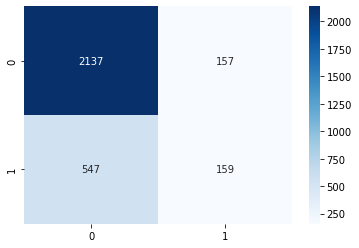

In [63]:
# YOUR CODE HERE
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Blues', fmt='.4g');

### Question 8. 🛫 Looking at the confusion matrix for the model trained above, how many employees are predicted to leave by the model **in the test set**?  
**Hint**: looking at the confusion matrix add up the number of employees predicted to leave and who actually left and the number of employees predicted to leave and who actually stayed.

In [64]:
# YOUR CODE HERE
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('True positives: '+str(tp))
print('False positives: '+str(fp))
print('True negatives: '+str(tn))
print('False negatives: '+str(fn))
print('Total predicted to leave: ' +str(tp+fp))

True positives: 159
False positives: 157
True negatives: 2137
False negatives: 547
Total predicted to leave: 316


Train a model using a K-Nearest Neighbours (KNN) algorithm, setting `knn = KNeighborsClassifier(n_neighbors=3)`. Use the same features as in the previous model and the same train-test-split as before.

In [65]:
# YOUR CODE HERE
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

### Question 9. 🔮 What is the test accuracy score for the KNN  model? Round to *two decimals*. e.g.: 0.6194 should be rounded to 0.62.

In [66]:
# YOUR CODE HERE
print(f"TEST ACCURACY SCORE:\n{accuracy_score(y_test, y_pred):.2f}")

TEST ACCURACY SCORE:
0.95


Plot the confusion matrix for the KNN model.

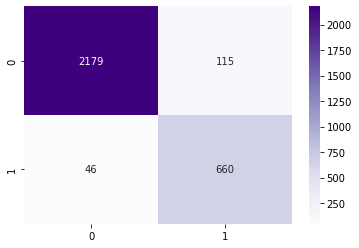

In [67]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Purples', fmt='.4g');

### Question 10. 🥇 Try to improve the predictive model and obtain a better accuracy score on the same test set. What is the best **test accuracy** score you obtain? Round to *two decimals*. e.g.: 0.6194 should be rounded to 0.62. Very briefly explain what you did to improve the model.

**Hint**: example of possible ideas that might work on their own or in combination: apply standardisation, encode the department variable for example with a one-hot encoder and add it to your model, encode salary as an ordinal variable (with the 0 label for the lowest income), use a decision tree classifier.

In [68]:
# FOR EXAMPLE

# apply normalization
scaler = StandardScaler()
scaler.fit(X_train, y_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# train a decision tree classifier
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.972
